In [229]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [230]:
SGA = Table.read("/global/homes/b/barnerg/DESI_SGA/Morphology/SGA_morph.fits")

In [231]:
SGA

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z,r90,r50,r20,z50,g50,C_r50_r90,C_r20_r90,m(r50),m(z50),m(g50),Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
284583,SGA-2020 284583,PGC1753576,1753576,246.63893700000006,25.882395000000002,E,83.58,0.4168694,0.61659503,0.049369153,23.009481,16.281,False,LEDA-20181114,102768,2MASXJ16263037+2552589_GROUP,3,False,246.63132430980986,25.886678155342814,0.92581606,2465p260,246.63899443421053,25.88239593752038,1.0317777,SB26,89.25743,0.7660097,246.63894134159338,25.882421271706928,21.809486,7.683644,7.267518,6.908575,6.584644,8.19172,10.043491,12.2072115,14.66538,17.695236,21.416355,25.87598,30.953333,16.50979,15.567412,14.869183,16.380758,15.444356,14.747147,16.275633,15.342991,14.648945,16.190153,15.260059,14.5695095,16.121006,15.193452,14.5059595,16.06036,15.134916,14.4499445,16.00693,15.085361,14.402035,15.962352,15.040784,14.35771,15.920147,15.0014,14.320146,0.030591438,0.04308892,0.045999907,0.04829483,0.06055945,0.080751404,0.0973,0.124484144,0.20583051,0.01532438,0.015401917,0.015267819,0.013852132,0.013975341,0.01385223,0.012736728,0.012889164,0.012807729,0.0118285,0.011991284,0.011952993,0.011088653,0.011258294,0.011255878,0.01050395,0.010681791,0.010707616,0.010012423,0.010216223,0.010258886,0.009653168,0.009853663,0.009897824,0.0092963725,0.009511294,0.009575142,15.662999,7318.958,8.404456e-05,0.7656309,0.11777708,14.75623

In [232]:
bool_index1 = np.isfinite(SGA['Delta(g_r)'])
bool_index2 = np.isfinite(SGA['g_r'])
bool_index3 = np.isfinite(SGA['g_z'])
bool_index4 = np.isfinite(SGA['r_z'])
bool_index5 = np.isfinite(SGA['Delta(g_z)'])
bool_index6 = np.isfinite(SGA['Delta(r_z)'])

good_indices = bool_index1 & bool_index2 & bool_index3 & bool_index4 & bool_index5 & bool_index6
SGA = SGA[good_indices]

In [233]:
E = SGA[SGA['HUBBLE_TYPE']==-5.0]
L = SGA[(SGA['HUBBLE_TYPE']==-2.0) | (SGA['HUBBLE_TYPE']==0)]
S = SGA[(SGA['HUBBLE_TYPE']==2.0) | (SGA['HUBBLE_TYPE']==3.0) | (SGA['HUBBLE_TYPE']==4.0)]
#S =  SGA[(SGA['HUBBLE_TYPE']==1.0) | (SGA['HUBBLE_TYPE']==5.0) | (SGA['HUBBLE_TYPE']==6.0) | (SGA['HUBBLE_TYPE']==7.0)SGA[(SGA['HUBBLE_TYPE']==2.0) | (SGA['HUBBLE_TYPE']==3.0) | (SGA['HUBBLE_TYPE']==4.0)]
I = SGA[SGA['HUBBLE_TYPE']==9.0]
#Nonclass= SGA[(SGA['HUBBLE_TYPE']<-5.0) | (SGA['HUBBLE_TYPE']>9.0)]
#Nonclass = SGA[SGA['HUBBLE_TYPE'].mask]

In [262]:
x = E['Delta(g_r)']
y = E['g_r']
a = L['Delta(g_r)']
b = L['g_r']
c = S['Delta(g_r)']
d = S['g_r']
#e = S['Delta(g_r)']
#f = S['g_r']
g = I['Delta(g_r)']
h = I['g_r']
#i = Nonclass['Delta(g_r)']
#j = Nonclass['g_r']

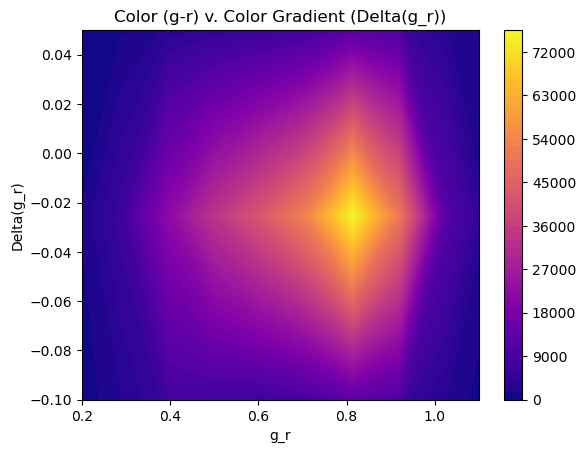

In [263]:
hist, xedges, yedges= np.histogram2d(SGA['g_r'],SGA['Delta(g_r)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('g_r')
plt.ylabel('Delta(g_r)')
plt.title('Color (g-r) v. Color Gradient (Delta(g_r))')
plt.axis([0.2, 1.1, -0.10, 0.05])
plt.savefig('Color(g_r)vCGradient(g_r).png',dpi=300)

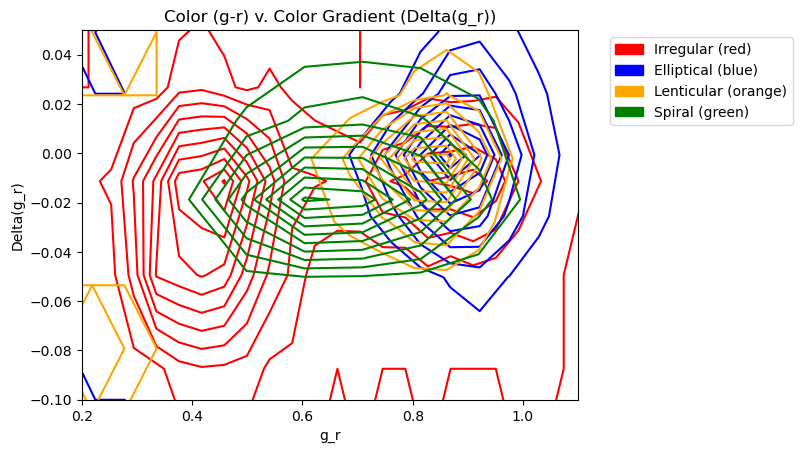

In [264]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

# Set labels and title
plt.xlabel('g_r')
plt.ylabel('Delta(g_r)')
plt.title('Color (g-r) v. Color Gradient (Delta(g_r))')

# Set plot limits
plt.axis([0.2, 1.1, -0.10, 0.05])

# Add legend with custom handles and labels
plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
#plt.savefig('Color(g_r)vCGradient(g_r)morph.png')
plt.savefig('Color(g_r)vCGradient(g_r)morph.png',dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [237]:
x = E['Delta(g_r)']
y = E['g_z']
a = L['Delta(g_r)']
b = L['g_z']
c = S['Delta(g_r)']
d = S['g_z']
#e = S['Delta(g_r)']
#f = S['g_z']
g = I['Delta(g_r)']
h = I['g_z']
#i = Nonclass['Delta(g_r)']
#j = Nonclass['g_z']

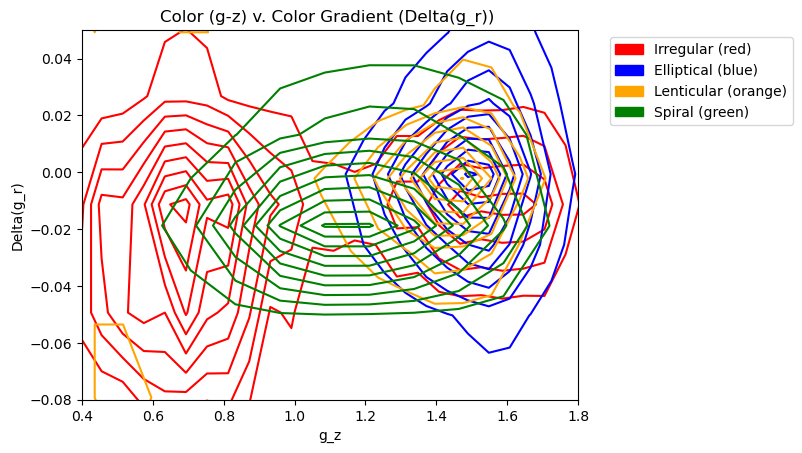

In [238]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('g_z')
plt.ylabel('Delta(g_r)')
plt.title('Color (g-z) v. Color Gradient (Delta(g_r)) ')
plt.axis([0.4, 1.8, -0.08, 0.05])
plt.savefig('Color(g_z)vCGradient(g_r)morph.png',dpi=300, bbox_inches='tight')


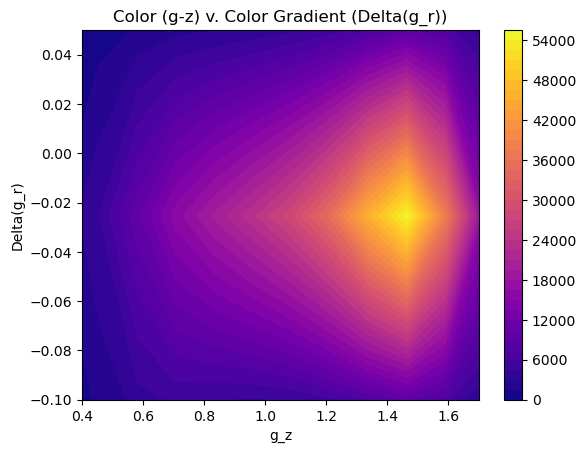

In [239]:
hist, xedges, yedges= np.histogram2d(SGA['g_z'],SGA['Delta(g_r)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('g_z')
plt.ylabel('Delta(g_r)')
plt.title('Color (g-z) v. Color Gradient (Delta(g_r))')
plt.axis([0.4, 1.7, -0.1, 0.05])
plt.savefig('Color(g_z)vCGradient(g_r).png',dpi=300)

In [240]:
x = E['Delta(g_r)']
y = E['r_z']
a = L['Delta(g_r)']
b = L['r_z']
c = S['Delta(g_r)']
d = S['r_z']
#e = S['Delta(g_r)']
#f = S['r_z']
g = I['Delta(g_r)']
h = I['r_z']
#i = Nonclass['Delta(g_r)']
#j = Nonclass['r_z']

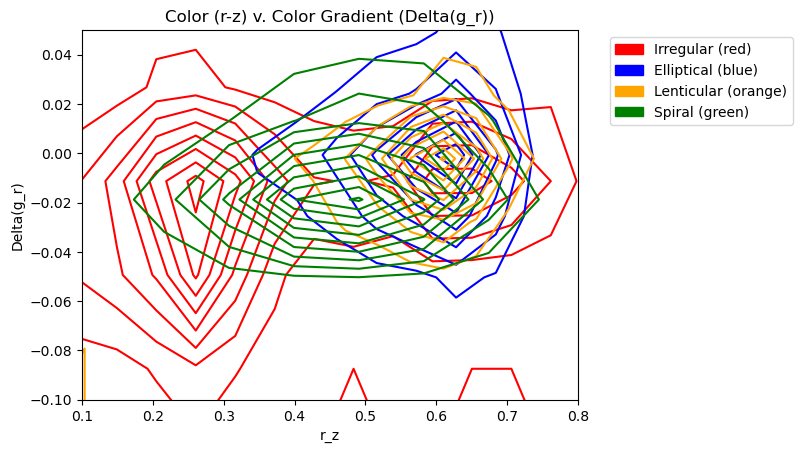

In [241]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('r_z')
plt.ylabel('Delta(g_r)')
plt.title('Color (r-z) v. Color Gradient (Delta(g_r))')
plt.axis([0.1, 0.8, -0.1, 0.05])
plt.savefig('Color(r_z)vCGradient(g_r)morph.png',dpi=300, bbox_inches='tight')

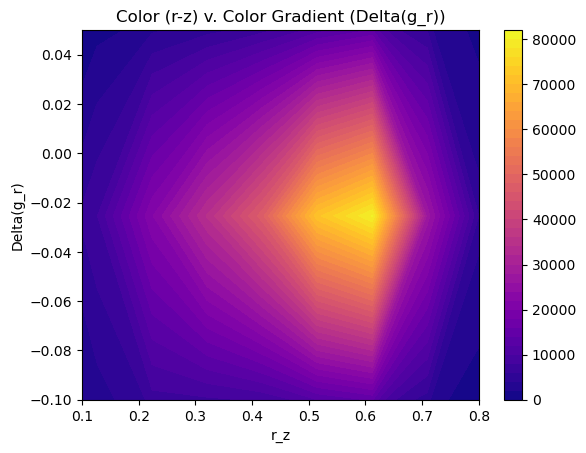

In [242]:
hist, xedges, yedges= np.histogram2d( SGA['r_z'],SGA['Delta(g_r)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('r_z')
plt.ylabel('Delta(g_r)')
plt.title('Color (r-z) v. Color Gradient (Delta(g_r))')
plt.axis([0.1, 0.8, -0.1, 0.05])
plt.savefig('Color(r_z)vCGradient(g_r).png',dpi=300)

In [243]:
x = E['Delta(g_z)']
y = E['g_r']
a = L['Delta(g_z)']
b = L['g_r']
c = S['Delta(g_z)']
d = S['g_r']
#e = S['Delta(g_z)']
#f = S['g_r']
g = I['Delta(g_z)']
h = I['g_r']
#i = Nonclass['Delta(g_z)']
#j = Nonclass['g_r']

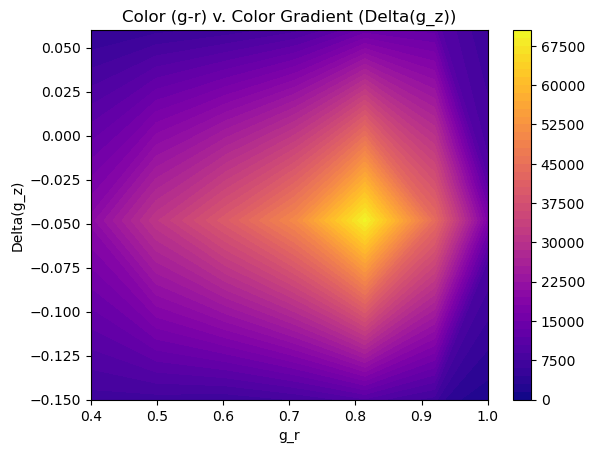

In [244]:
hist, xedges, yedges= np.histogram2d( SGA['g_r'],SGA['Delta(g_z)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('g_r')
plt.ylabel('Delta(g_z)')
plt.title('Color (g-r) v. Color Gradient (Delta(g_z))')
plt.axis([0.4, 1, -0.15, 0.06])
plt.savefig('Color(g_r)vCGradient(g_z).png',dpi=300)

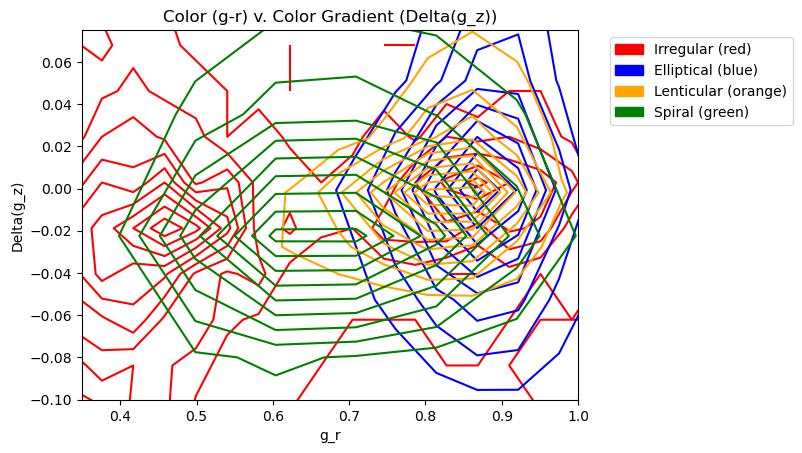

In [245]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('g_r')
plt.ylabel('Delta(g_z)')
plt.title('Color (g-r) v. Color Gradient (Delta(g_z))')
plt.axis([0.35, 1, -0.1, 0.075])
plt.savefig('Color(g_r)vCGradient(g_z)morph.png',dpi=300, bbox_inches='tight')

In [246]:
x = E['Delta(g_z)']
y = E['g_z']
a = L['Delta(g_z)']
b = L['g_z']
c = S['Delta(g_z)']
d = S['g_z']
#e = S['Delta(g_z)']
#f = S['g_z']
g = I['Delta(g_z)']
h = I['g_z']
#i = Nonclass['Delta(g_z)']
#j = Nonclass['g_z']

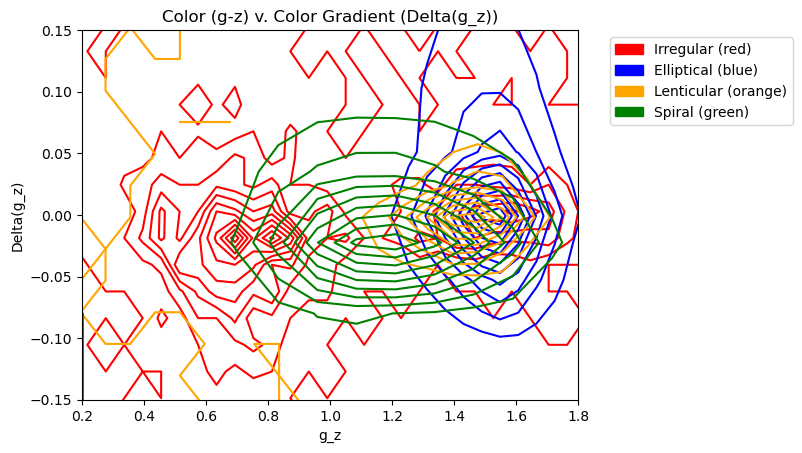

In [247]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('g_z')
plt.ylabel('Delta(g_z)')
plt.title('Color (g-z) v. Color Gradient (Delta(g_z))')
plt.axis([ 0.2, 1.8,-0.15, 0.15])

plt.savefig('Color(g_z)vCGradient(g_z)morph.png',dpi=300, bbox_inches='tight')


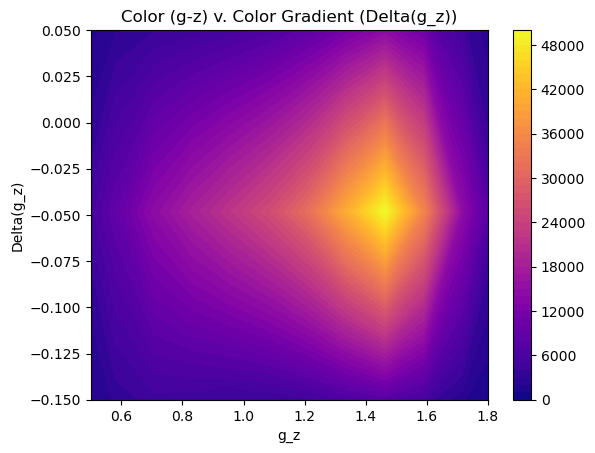

In [249]:
hist, xedges, yedges= np.histogram2d(SGA['g_z'],SGA['Delta(g_z)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('g_z')
plt.ylabel('Delta(g_z)')
plt.title('Color (g-z) v. Color Gradient (Delta(g_z))')
plt.axis([ 0.5, 1.8,-0.15, 0.05])
plt.savefig('Color(g_z)vCGradient(g_z).png',dpi=300)

In [250]:
x = E['Delta(g_z)']
y = E['r_z']
a = L['Delta(g_z)']
b = L['r_z']
c = S['Delta(g_z)']
d = S['r_z']
#e = S['Delta(g_z)']
#f = S['g_z']
g = I['Delta(g_z)']
h = I['r_z']
#i = Nonclass['Delta(g_z)']
#j = Nonclass['g_z']

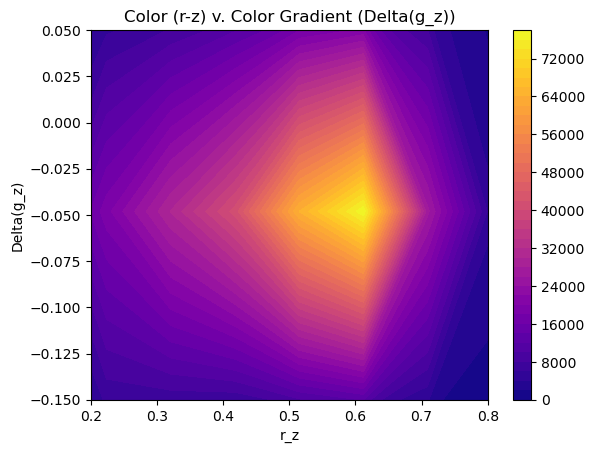

In [251]:
hist, xedges, yedges= np.histogram2d(SGA['r_z'],SGA['Delta(g_z)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('r_z')
plt.ylabel('Delta(g_z)')
plt.title('Color (r-z) v. Color Gradient (Delta(g_z))')
plt.axis([ 0.2, 0.8,-0.15, 0.05])
plt.savefig('Color(r_z)vCGradient(g_z).png',dpi=300)

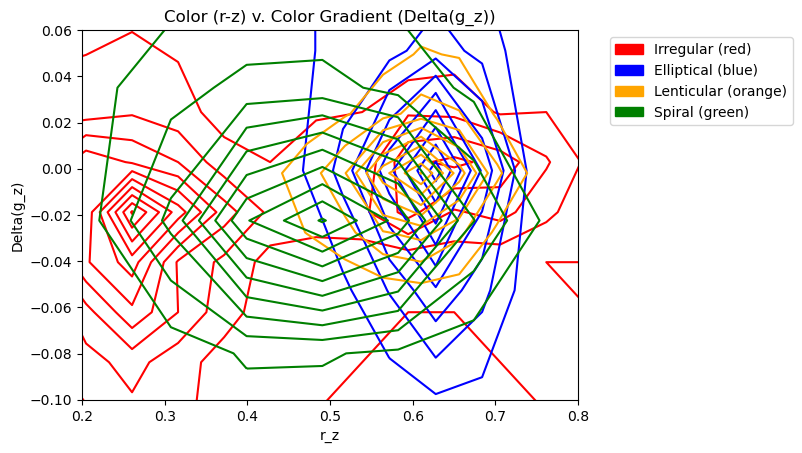

In [252]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('r_z')
plt.ylabel('Delta(g_z)')
plt.title('Color (r-z) v. Color Gradient (Delta(g_z))')
plt.axis([0.2, 0.8,-0.1, 0.06])
plt.savefig('Color(r_z)vCGradient(g_z)morph.png',dpi=300, bbox_inches='tight')

In [253]:
x = E['Delta(r_z)']
y = E['g_r']
a = L['Delta(r_z)']
b = L['g_r']
c = S['Delta(r_z)']
d = S['g_r']
#e = S['Delta(g_z)']
#f = S['g_r']
g = I['Delta(r_z)']
h = I['g_r']
#i = Nonclass['Delta(g_z)']
#j = Nonclass['g_r']

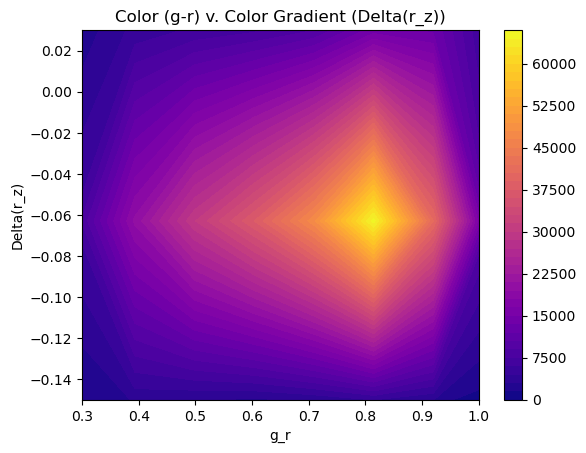

In [254]:
hist, xedges, yedges= np.histogram2d( SGA['g_r'],SGA['Delta(r_z)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('g_r')
plt.ylabel('Delta(r_z)')
plt.title('Color (g-r) v. Color Gradient (Delta(r_z))')
plt.axis([0.3, 1, -0.15, 0.03])
plt.savefig('Color(g_r)vCGradient(r_z).png',dpi=300)

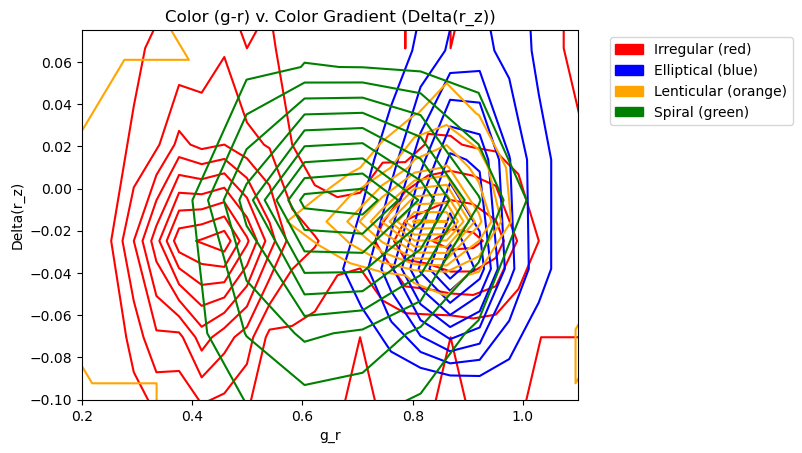

In [255]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('g_r')
plt.ylabel('Delta(r_z)')
plt.title('Color (g-r) v. Color Gradient (Delta(r_z))')
plt.axis([0.2, 1.1, -0.1, 0.075])
plt.savefig('Color(g_r)vCGradient(r_z)morph.png',dpi=300, bbox_inches='tight')

In [256]:
x = E['Delta(r_z)']
y = E['g_z']
a = L['Delta(r_z)']
b = L['g_z']
c = S['Delta(r_z)']
d = S['g_z']
#e = S['Delta(g_z)']
#f = S['g_z']
g = I['Delta(r_z)']
h = I['g_z']
#i = Nonclass['Delta(g_z)']
#j = Nonclass['g_z']

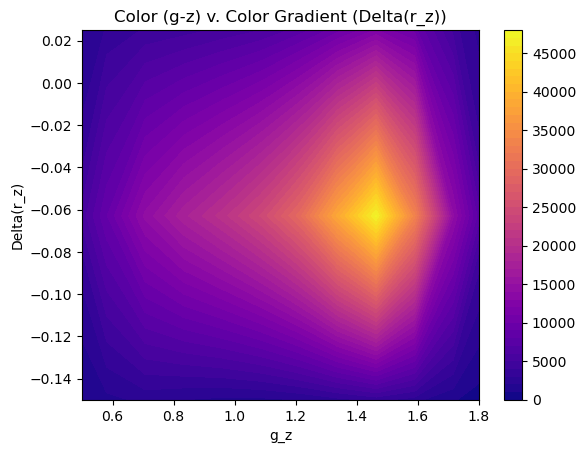

In [257]:
hist, xedges, yedges= np.histogram2d(SGA['g_z'],SGA['Delta(r_z)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('g_z')
plt.ylabel('Delta(r_z)')
plt.title('Color (g-z) v. Color Gradient (Delta(r_z))')
plt.axis([ 0.5, 1.8,-0.15, 0.025])
plt.savefig('Color(g_z)vCGradient(r_z).png',dpi=300)

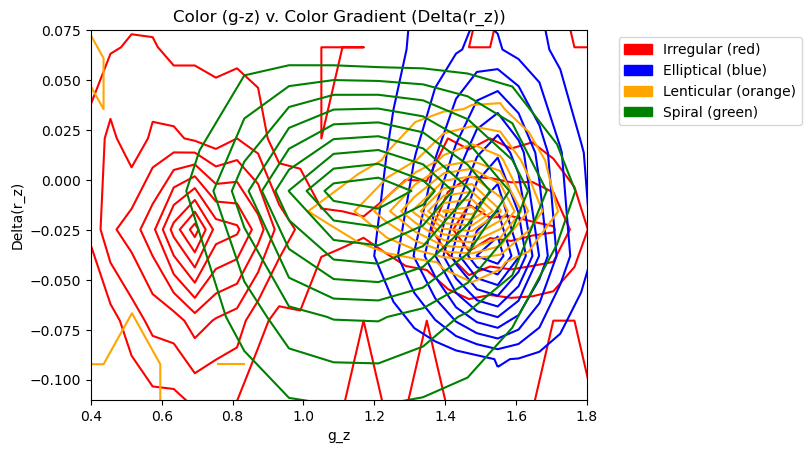

In [258]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('g_z')
plt.ylabel('Delta(r_z)')
plt.title('Color (g-z) v. Color Gradient (Delta(r_z))')
plt.axis([ 0.4, 1.8,-0.11, 0.075])

plt.savefig('Color(g_z)vCGradient(r_z)morph.png',dpi=300, bbox_inches='tight')

In [259]:
x = E['Delta(r_z)']
y = E['r_z']
a = L['Delta(r_z)']
b = L['r_z']
c = S['Delta(r_z)']
d = S['r_z']
#e = S['Delta(g_z)']
#f = S['g_z']
g = I['Delta(r_z)']
h = I['r_z']
#i = Nonclass['Delta(g_z)']
#j = Nonclass['g_z']

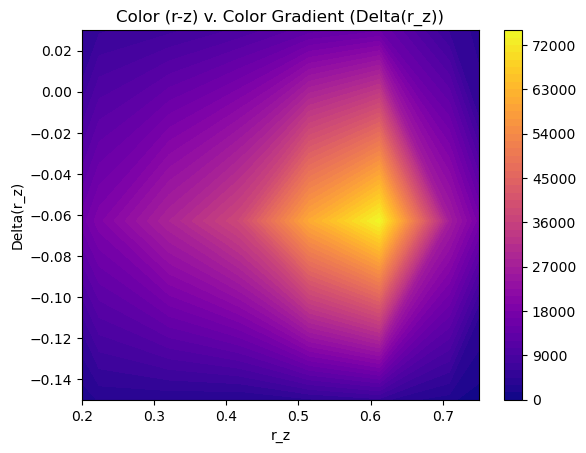

In [260]:
hist, xedges, yedges= np.histogram2d(SGA['r_z'],SGA['Delta(r_z)'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('r_z')
plt.ylabel('Delta(r_z)')
plt.title('Color (r-z) v. Color Gradient (Delta(r_z))')
plt.axis([ 0.2, 0.75,-0.15, 0.03])
plt.savefig('Color(r_z)vCGradient(r_z).png',dpi=300)

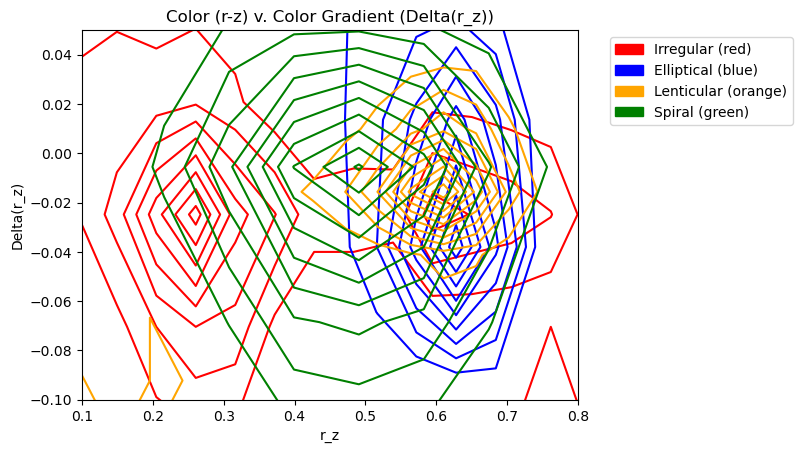

In [261]:
hist, xedges, yedges = np.histogram2d(h, g, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='red', levels=10)

hist, xedges, yedges = np.histogram2d(y, x, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue', levels=10)

hist, xedges, yedges = np.histogram2d(b, a, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='orange', levels=10)

hist, xedges, yedges = np.histogram2d(d, c, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='green', levels=10)

# Set labels for each contour plot
label1 = 'Irregular (red)'
label2 = 'Elliptical (blue)'
label3 = 'Lenticular (orange)'
label4 = 'Spiral (green)'

# Create custom legend handles
patch1 = mpatches.Patch(color='red', label=label1)
patch2 = mpatches.Patch(color='blue', label=label2)
patch3 = mpatches.Patch(color='orange', label=label3)
patch4 = mpatches.Patch(color='green', label=label4)

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('r_z')
plt.ylabel('Delta(r_z)')
plt.title('Color (r-z) v. Color Gradient (Delta(r_z))')
plt.axis([ 0.1, 0.8,-0.1, 0.05])
plt.savefig('Color(r_z)vCGradient(r_z)morph.png',dpi=300, bbox_inches='tight')
